
# Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)



In [2]:
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

### Loading dataset

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
#declaring list to store accuracies f different parameters
acc=[]
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


### Splitting into a training set and a test and keep 25% of the data for testing.



In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_comp = 0.895

### Training an SVM classification model



In [5]:
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)


Quantitative evaluation of the model quality on the test set



In [6]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plotting the gallery of the most significative eigenfaces



auto  svd_solver 

Extracting the top 0 eigenfaces from 837 faces done in 0.210s
Projecting the input data on the eigenfaces orthonormal basis done in 0.010s
Fitting the classifier to the training set done in 3.144s
Best estimator found by grid search:
SVC(C=11400.186536364468, class_weight='balanced', gamma=0.012663164434742163)
Predicting people's names on the test set done in 0.059s


                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        21
     Colin Powell       0.82      0.93      0.87        83
  Donald Rumsfeld       0.91      0.76      0.83        41
    George W Bush       0.85      0.96      0.90       192
Gerhard Schroeder       0.84      0.79      0.82        34
      Hugo Chavez       1.00      0.72      0.84        25
       Tony Blair       0.95      0.73      0.82        55

         accuracy                           0.87       451
        macro avg       0.91      0.79      0.84       451
     weighted avg

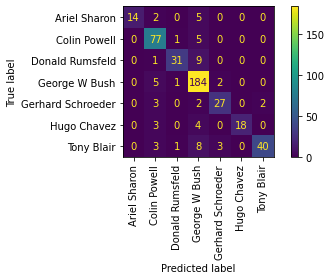

 Result of the prediction on a portion of the test set


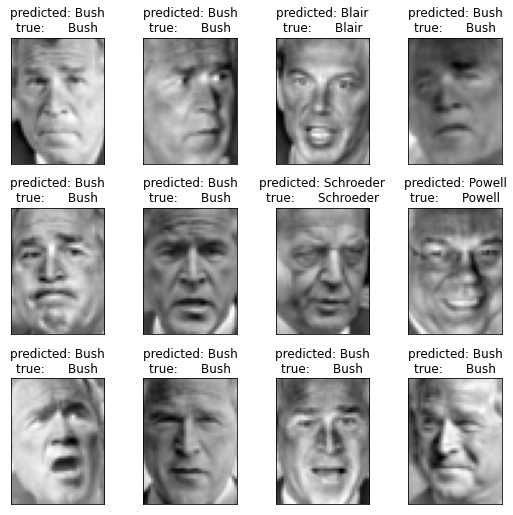

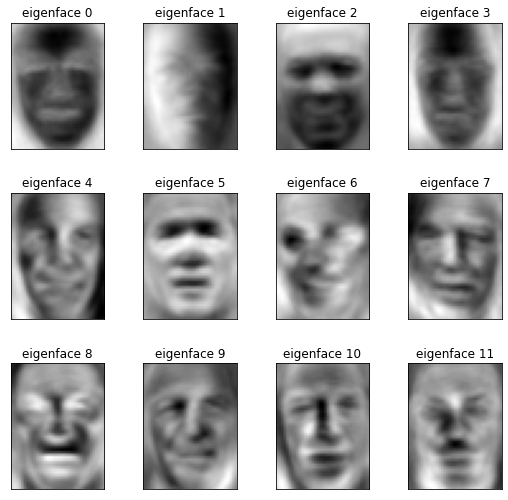

full  svd_solver 

Extracting the top 0 eigenfaces from 837 faces done in 0.203s
Projecting the input data on the eigenfaces orthonormal basis done in 0.008s
Fitting the classifier to the training set done in 3.400s
Best estimator found by grid search:
SVC(C=49282.527812538974, class_weight='balanced', gamma=0.011572855940855787)
Predicting people's names on the test set done in 0.059s


                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        21
     Colin Powell       0.83      0.93      0.87        83
  Donald Rumsfeld       0.91      0.76      0.83        41
    George W Bush       0.85      0.96      0.90       192
Gerhard Schroeder       0.85      0.82      0.84        34
      Hugo Chavez       1.00      0.72      0.84        25
       Tony Blair       0.95      0.75      0.84        55

         accuracy                           0.87       451
        macro avg       0.91      0.80      0.84       451
     weighted avg

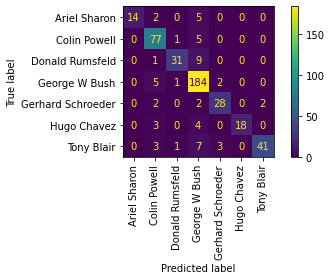

 Result of the prediction on a portion of the test set


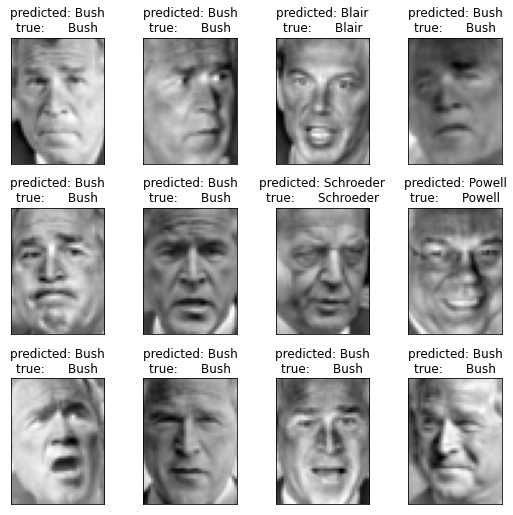

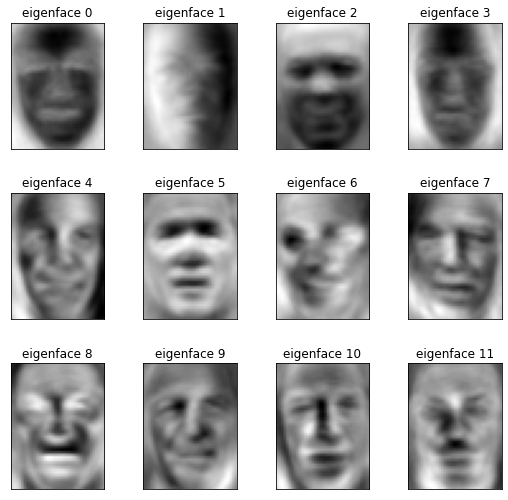

randomized  svd_solver 

Extracting the top 0 eigenfaces from 837 faces done in 0.088s
Projecting the input data on the eigenfaces orthonormal basis done in 0.008s
Fitting the classifier to the training set done in 4.321s
Best estimator found by grid search:
SVC(C=1431.5438351304938, class_weight='balanced', gamma=0.003923495946632659)
Predicting people's names on the test set done in 0.051s


                   precision    recall  f1-score   support

     Ariel Sharon       0.87      0.62      0.72        21
     Colin Powell       0.77      0.86      0.81        83
  Donald Rumsfeld       0.91      0.78      0.84        41
    George W Bush       0.84      0.96      0.90       192
Gerhard Schroeder       0.90      0.82      0.86        34
      Hugo Chavez       0.94      0.68      0.79        25
       Tony Blair       0.95      0.69      0.80        55

         accuracy                           0.85       451
        macro avg       0.88      0.77      0.82       451
     weight

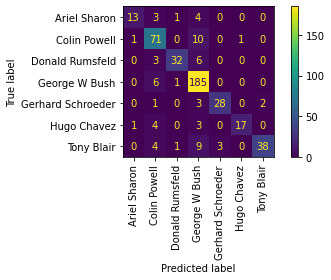

 Result of the prediction on a portion of the test set


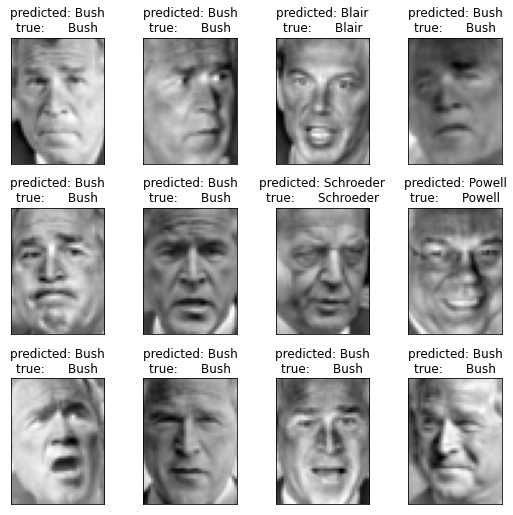

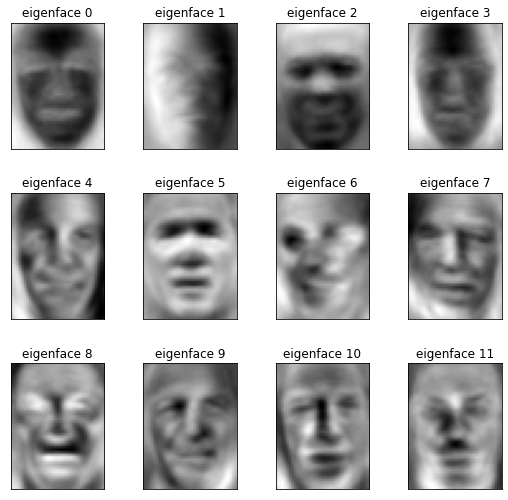

arpack  svd_solver 

Extracting the top 0 eigenfaces from 837 faces done in 0.129s
Projecting the input data on the eigenfaces orthonormal basis done in 0.009s
Fitting the classifier to the training set done in 5.074s
Best estimator found by grid search:
SVC(C=7180.555841731969, class_weight='balanced', gamma=0.002147444748903171)
Predicting people's names on the test set done in 0.048s


                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.71      0.70        21
     Colin Powell       0.76      0.88      0.82        83
  Donald Rumsfeld       0.84      0.76      0.79        41
    George W Bush       0.88      0.92      0.90       192
Gerhard Schroeder       0.78      0.74      0.76        34
      Hugo Chavez       0.85      0.68      0.76        25
       Tony Blair       0.93      0.73      0.82        55

         accuracy                           0.84       451
        macro avg       0.82      0.77      0.79       451
     weighted av

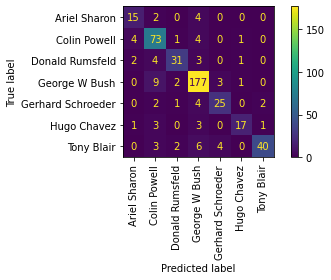

 Result of the prediction on a portion of the test set


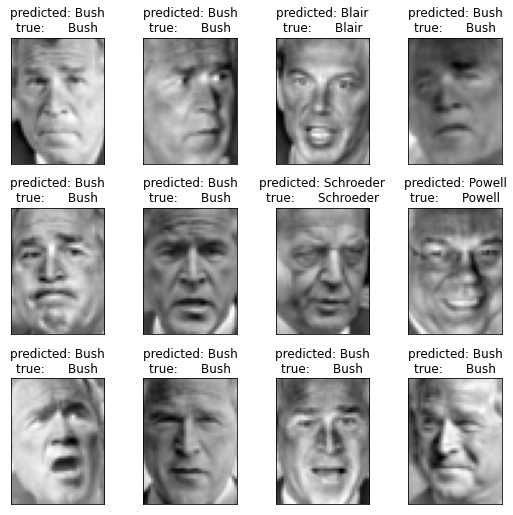

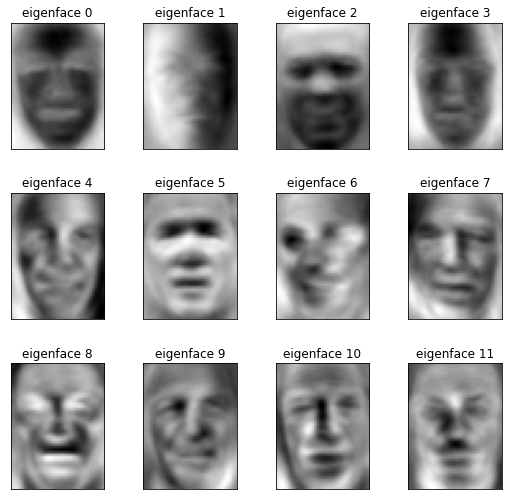

In [7]:
from sklearn.metrics import accuracy_score
import pandas as pd
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)
solver_list=["auto","full","randomized", "arpack" ]

for i in solver_list:
    print('\033[1m' + i," svd_solver"  + '\033[0m',"\n")
    t0 = time()
    pca = PCA(n_components=n_comp if i!= "arpack" and i != "randomized" else 150, svd_solver=i, whiten=True).fit(X_train)
    eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("Projecting the input data on the eigenfaces orthonormal basis done in %0.3fs" % (time() - t0))
    clf = clf.fit(X_train_pca, y_train)
    print("Fitting the classifier to the training set done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
   
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print("Predicting people's names on the test set done in %0.3fs" % (time() - t0))
    print("\n")
    print(classification_report(y_test, y_pred, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(
      clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
      )
  
    plt.tight_layout()
    
    plt.show()
    print('\033[1m' + " Result of the prediction on a portion of the test set" + '\033[1m')
    prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
     ]

    plot_gallery(X_test, prediction_titles, h, w)
    
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
    plot_gallery(eigenfaces, eigenface_titles, h, w)
 
    plt.show()
    acc.append(accuracy_score(y_test, y_pred))



## Quantitative results of PCA

In [8]:
df = pd.DataFrame()
df['svd_solvers'] = solver_list
df['Accuracies']  = acc
print('\033[1m' + f"Maximum accuracy is: {max(df['Accuracies'])} achieved at svd_solver = {df[df['Accuracies'] == max(df['Accuracies'])]['svd_solvers'].tolist()} " + '\033[1m'+"\n")
print('\033[1m' + "Tabular results of accuracies of different PCA parameters" + '\033[1m')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)


Maximum accuracy is: 0.8713968957871396 achieved at svd_solver = ['full'] 

Tabular results of accuracies of different PCA parameters


,svd_solvers,Accuracies
0,auto,0.866962
1,full,0.871397
2,randomized,0.851441
3,arpack,0.838137


## Quantitative results of PCA plotted

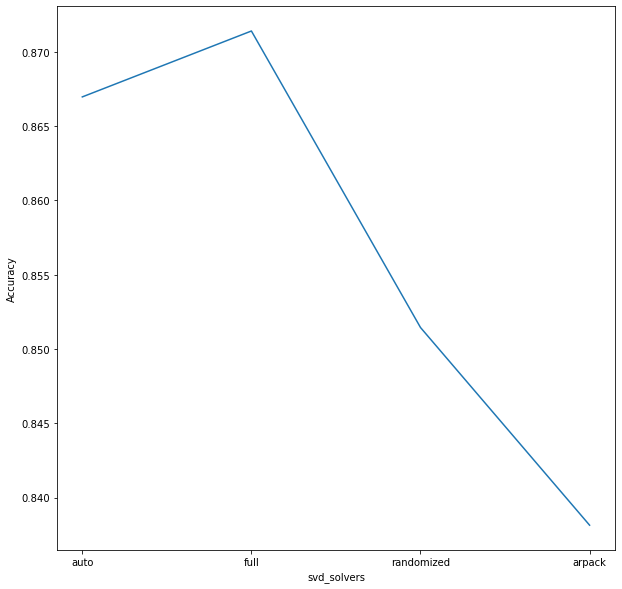

In [9]:

plt.figure(figsize = (10, 10))
plt.plot(solver_list,acc)
plt.xlabel("svd_solvers")
plt.ylabel("Accuracy")
plt.show()

Face recognition problem would be much more effectively solved by training
convolutional neural networks but this family of models is outside of the scope of
the scikit-learn library. Interested readers should instead try to use pytorch or
tensorflow to implement such models.



Projecting the input data on the eigenfaces orthonormal basis done in 0.014s
Fitting the classifier to the training set done in 3.994s
Best estimator found by grid search:
SVC(C=14780.627095043641, class_weight='balanced', gamma=0.00015775570018640073)
Predicting people's names on the test set done in 0.052s


                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.71      0.70        21
     Colin Powell       0.76      0.87      0.81        83
  Donald Rumsfeld       0.68      0.73      0.71        41
    George W Bush       0.92      0.80      0.86       192
Gerhard Schroeder       0.66      0.91      0.77        34
      Hugo Chavez       0.79      0.76      0.78        25
       Tony Blair       0.85      0.80      0.82        55

         accuracy                           0.81       451
        macro avg       0.76      0.80      0.78       451
     weighted avg       0.82      0.81      0.81       451



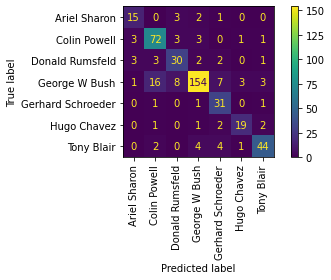

 Result of the prediction on a portion of the test set


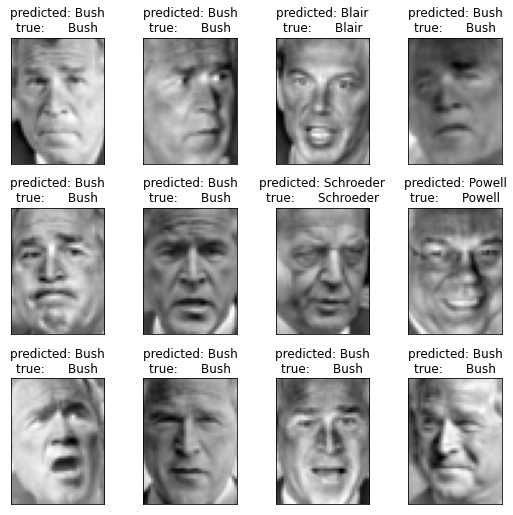

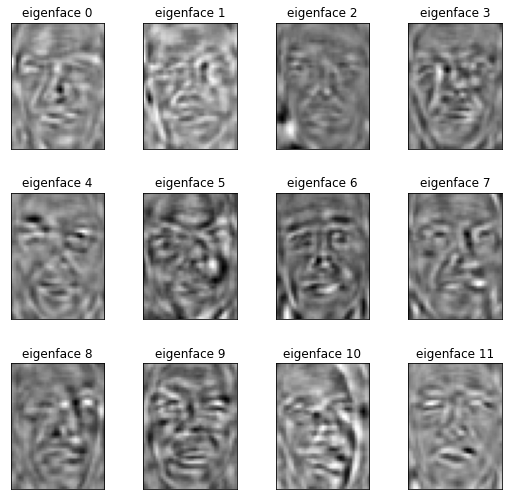

Projecting the input data on the eigenfaces orthonormal basis done in 0.009s
Fitting the classifier to the training set done in 3.760s
Best estimator found by grid search:
SVC(C=1274.8379733186816, class_weight='balanced', gamma=0.0009552492085676186)
Predicting people's names on the test set done in 0.054s


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.81      0.72        21
     Colin Powell       0.80      0.87      0.83        83
  Donald Rumsfeld       0.73      0.80      0.77        41
    George W Bush       0.95      0.83      0.89       192
Gerhard Schroeder       0.68      0.94      0.79        34
      Hugo Chavez       0.74      0.80      0.77        25
       Tony Blair       0.91      0.78      0.84        55

         accuracy                           0.84       451
        macro avg       0.78      0.83      0.80       451
     weighted avg       0.85      0.84      0.84       451



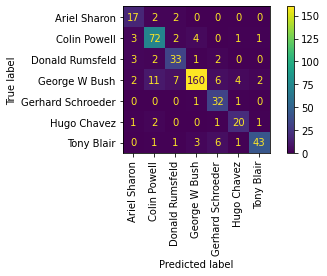

 Result of the prediction on a portion of the test set


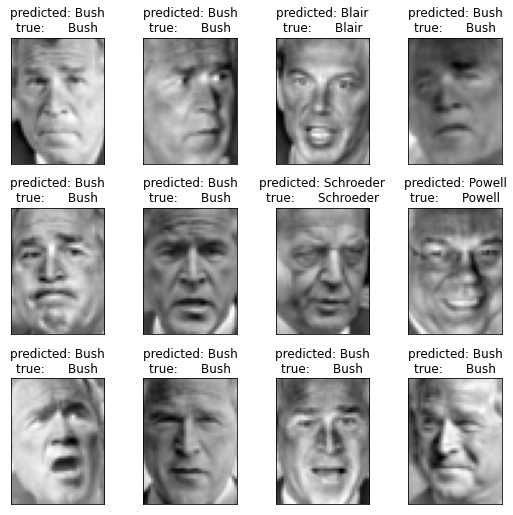

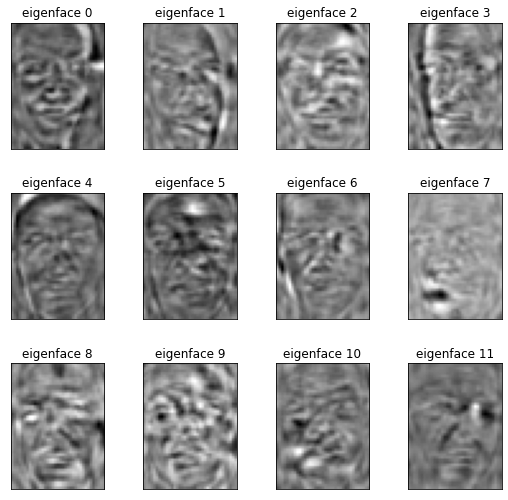

In [30]:
algo_list = ["parallel","deflation" ]
n_components = 150
acc = []
for i in algo_list:
    print('\033[1m' + i," Algorithm"  + '\033[0m',"\n")
    ica = FastICA(n_components, algorithm = i).fit(X_train)
    eigenfaces = ica.components_.reshape((n_components, h, w))
    t0 = time()
    X_train_ica = ica.transform(X_train)
    X_test_ica = ica.transform(X_test)
    print("Projecting the input data on the eigenfaces orthonormal basis done in %0.3fs" % (time() - t0))
    clf = clf.fit(X_train_ica, y_train)
    print("Fitting the classifier to the training set done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
   
    t0 = time()
    y_pred = clf.predict(X_test_ica)
    print("Predicting people's names on the test set done in %0.3fs" % (time() - t0))
    print("\n")
    print(classification_report(y_test, y_pred, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(
      clf, X_test_ica, y_test, display_labels=target_names, xticks_rotation="vertical"
      )
  
    plt.tight_layout()
    
    plt.show()
    print('\033[1m' + " Result of the prediction on a portion of the test set" + '\033[1m')
    prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
     ]

    plot_gallery(X_test, prediction_titles, h, w)
    
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
    plot_gallery(eigenfaces, eigenface_titles, h, w)
 
    plt.show()
    acc.append(accuracy_score(y_test, y_pred))



In [31]:
df = pd.DataFrame()
df['Algorithms'] = algo_list
df['Accuracies']  = acc
print('\033[1m' + f"Maximum accuracy is: {max(df['Accuracies'])} achieved at Algorithm = {df[df['Accuracies'] == max(df['Accuracies'])]['Algorithms'].tolist()} " + '\033[1m'+"\n")
print('\033[1m' + "Tabular results of accuracies of different PCA parameters" + '\033[1m')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

Maximum accuracy is: 0.835920177383592 achieved at Algorithm = ['deflation'] 

Tabular results of accuracies of different PCA parameters


,Algorithms,Accuracies
0,parallel,0.809313
1,deflation,0.835920


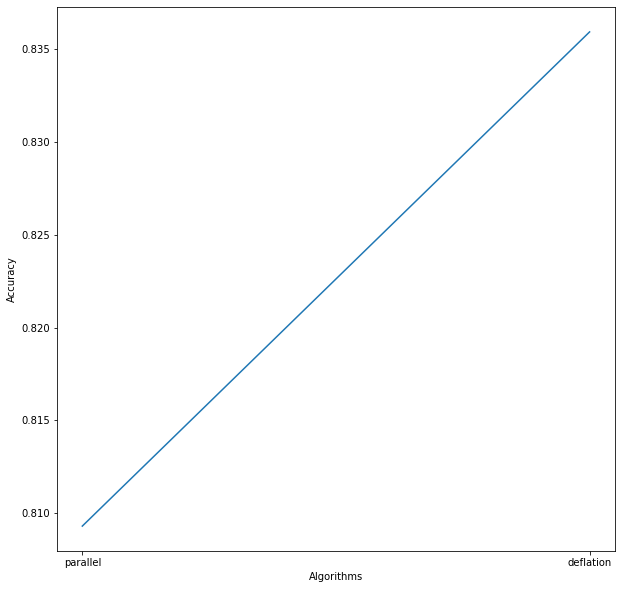

In [32]:

plt.figure(figsize = (10, 10))
plt.plot(algo_list,acc)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()